In [1]:
import pandas as pd

/tmp/ipykernel_25826/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Loading the dataset

In [2]:
data = pd.read_csv("/workspaces/Jobs-in-Recession-Analysis-With-Prediction/dataset.csv")

In [3]:
data.head()

,Year,Quarter,GDP_Growth,Inflation,Industrial_Production,Job_Market,Recession_Indicator
0,2016,Q1,3.866202,5.795522,4.063915,72806,0
1,2013,Q1,6.624839,4.008880,0.301156,51465,0
2,2022,Q4,3.469627,6.322668,-3.622371,64109,0
3,2020,Q3,3.907552,1.415962,-1.309438,53528,1
4,2017,Q4,1.586789,1.885589,2.220974,39230,0


## Preprocessing


In [4]:
data.isnull()

,Year,Quarter,GDP_Growth,Inflation,Industrial_Production,Job_Market,Recession_Indicator
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2995,False,False,False,False,False,False,False
2996,False,False,False,False,False,False,False
2997,False,False,False,False,False,False,False
2998,False,False,False,False,False,False,False


In [5]:
data.isnull().sum()

Year                     0
Quarter                  0
GDP_Growth               0
Inflation                0
Industrial_Production    0
Job_Market               0
Recession_Indicator      0
dtype: int64

#### Clearly Visible , there is no null , so our data is cleaned then proceeding to select features and target

#### Let's transform Quarter character values into integer for numerical data

In [6]:
X = data[['Year','Quarter','GDP_Growth','Inflation', 'Industrial_Production', 'Job_Market']]

In [7]:
y = data['Recession_Indicator']

In [8]:
X

,Year,Quarter,GDP_Growth,Inflation,Industrial_Production,Job_Market
0,2016,Q1,3.866202,5.795522,4.063915,72806
1,2013,Q1,6.624839,4.008880,0.301156,51465
2,2022,Q4,3.469627,6.322668,-3.622371,64109
3,2020,Q3,3.907552,1.415962,-1.309438,53528
4,2017,Q4,1.586789,1.885589,2.220974,39230
...,...,...,...,...,...,...
2995,2021,Q1,3.154164,12.653804,0.783076,43332
2996,2020,Q3,6.825993,2.673752,2.006138,10066
2997,2017,Q4,8.714885,13.569079,1.546320,42313
2998,2011,Q4,2.374860,5.110002,-4.509416,70857


In [9]:
y

0       0
1       0
2       0
3       1
4       0
       ..
2995    1
2996    1
2997    0
2998    0
2999    0
Name: Recession_Indicator, Length: 3000, dtype: int64

In [10]:
import matplotlib.pyplot as plt

### GDP Growth over time


In [11]:
df=data

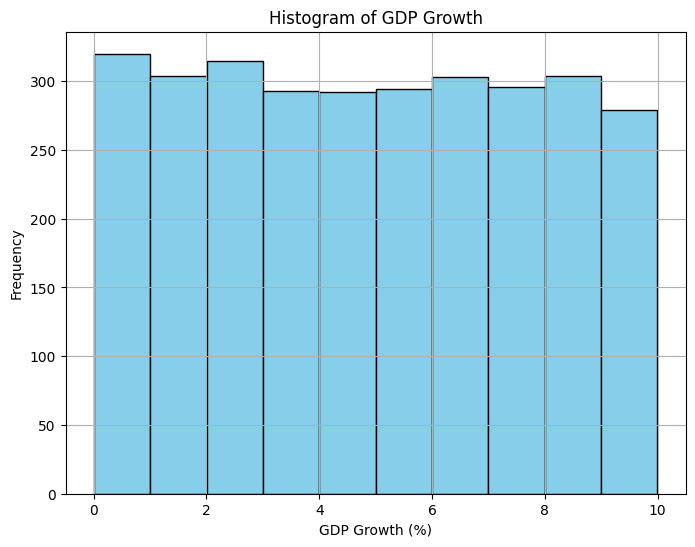

In [12]:
# Histogram for GDP Growth
plt.figure(figsize=(8, 6))
plt.hist(df['GDP_Growth'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of GDP Growth')
plt.xlabel('GDP Growth (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


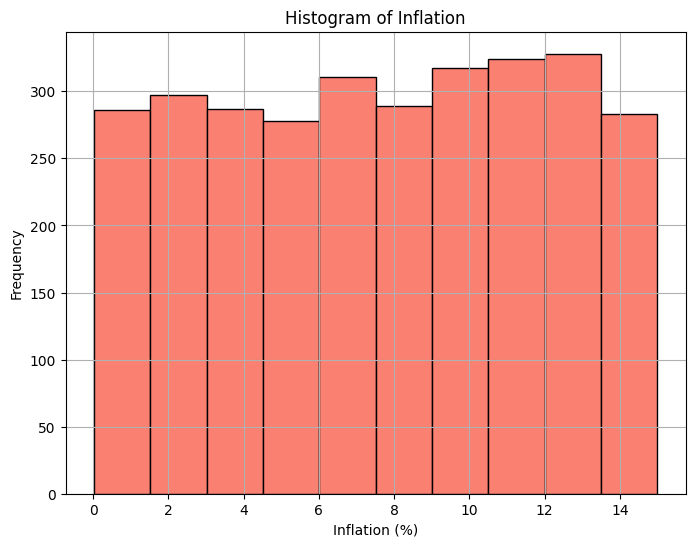

In [13]:
# Histogram for Inflation
plt.figure(figsize=(8, 6))
plt.hist(df['Inflation'], bins=10, color='salmon', edgecolor='black')
plt.title('Histogram of Inflation')
plt.xlabel('Inflation (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

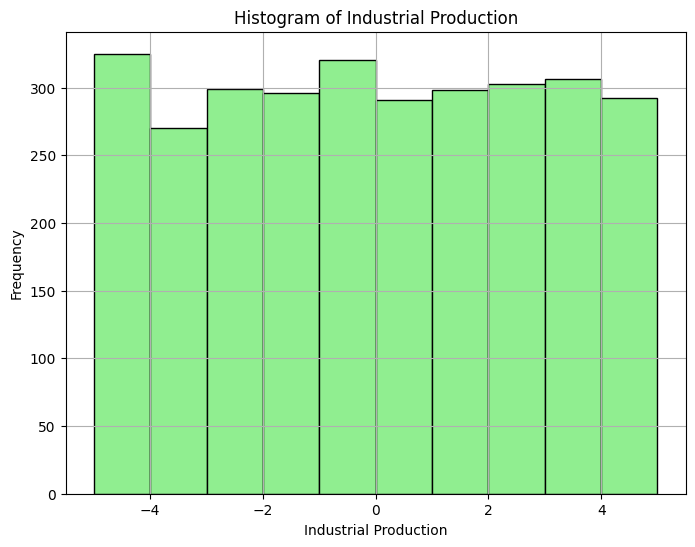

In [14]:
# Histogram for Industrial Production
plt.figure(figsize=(8, 6))
plt.hist(df['Industrial_Production'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Histogram of Industrial Production')
plt.xlabel('Industrial Production')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

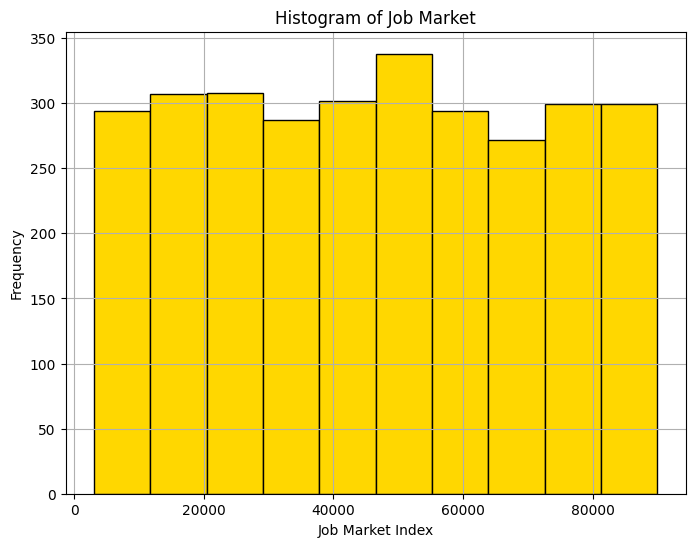

In [15]:
# Histogram for Job Market
plt.figure(figsize=(8, 6))
plt.hist(df['Job_Market'], bins=10, color='gold', edgecolor='black')
plt.title('Histogram of Job Market')
plt.xlabel('Job Market Index')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

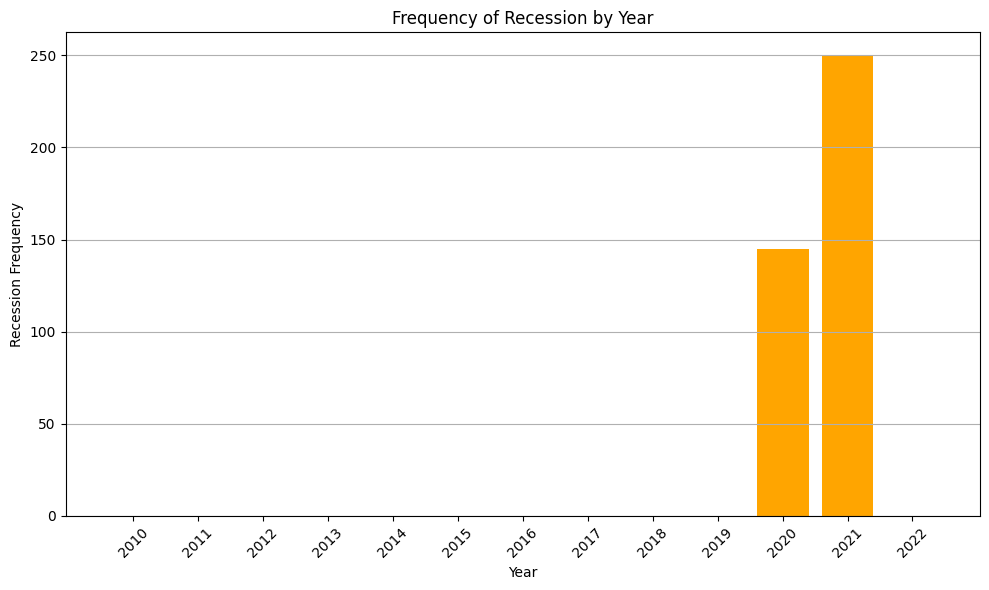

In [16]:
# Grouping by year and counting occurrences of recession
recession_counts = df.groupby('Year')['Recession_Indicator'].sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(recession_counts.index.astype(str), recession_counts, color='orange')
plt.title('Frequency of Recession by Year')
plt.xlabel('Year')
plt.ylabel('Recession Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

/tmp/ipykernel_25826/1598270722.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Year'].astype(str) + df['Quarter'])


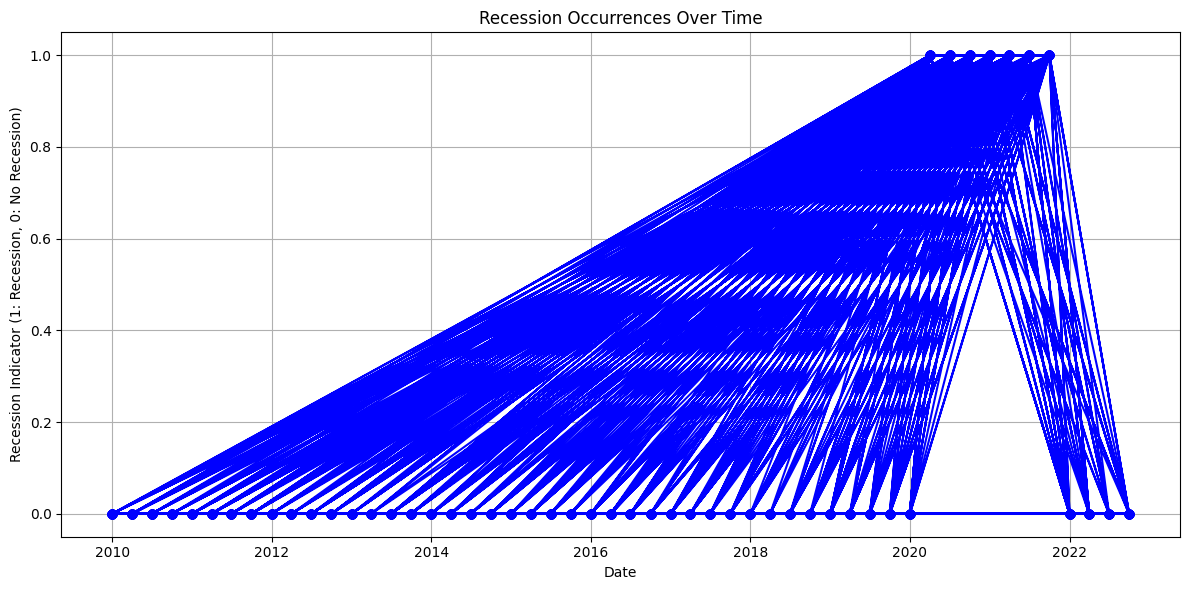

In [17]:
import matplotlib.pyplot as plt

# Convert Year and Quarter to datetime
df['Date'] = pd.to_datetime(df['Year'].astype(str) + df['Quarter'])

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Recession_Indicator'], marker='o', linestyle='-', color='blue')
plt.title('Recession Occurrences Over Time')
plt.xlabel('Date')
plt.ylabel('Recession Indicator (1: Recession, 0: No Recession)')
plt.grid(True)
plt.tight_layout()
plt.show()


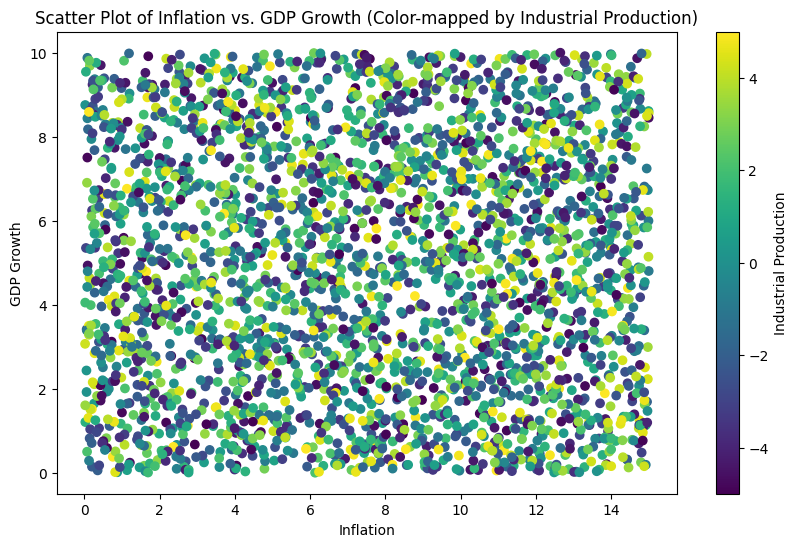

In [18]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Inflation'], df['GDP_Growth'], c=df['Industrial_Production'], cmap='viridis')
plt.xlabel('Inflation')
plt.ylabel('GDP Growth')
plt.title('Scatter Plot of Inflation vs. GDP Growth (Color-mapped by Industrial Production)')
plt.colorbar(label='Industrial Production')
plt.show()

/tmp/ipykernel_25826/2169597128.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count_0 = len(recession_years[recession_years['Quarter'] == quarter][recession_years['Recession_Indicator'] == 0])
/tmp/ipykernel_25826/2169597128.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count_1 = len(recession_years[recession_years['Quarter'] == quarter][recession_years['Recession_Indicator'] == 1])
/tmp/ipykernel_25826/2169597128.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count_0 = len(recession_years[recession_years['Quarter'] == quarter][recession_years['Recession_Indicator'] == 0])
/tmp/ipykernel_25826/2169597128.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count_1 = len(recession_years[recession_years['Quarter'] == quarter][recession_years['Recession_Indicator'] == 1])
/tmp/ipykernel_25826/2169597128.py:10: UserWarning: Boolean Series key w

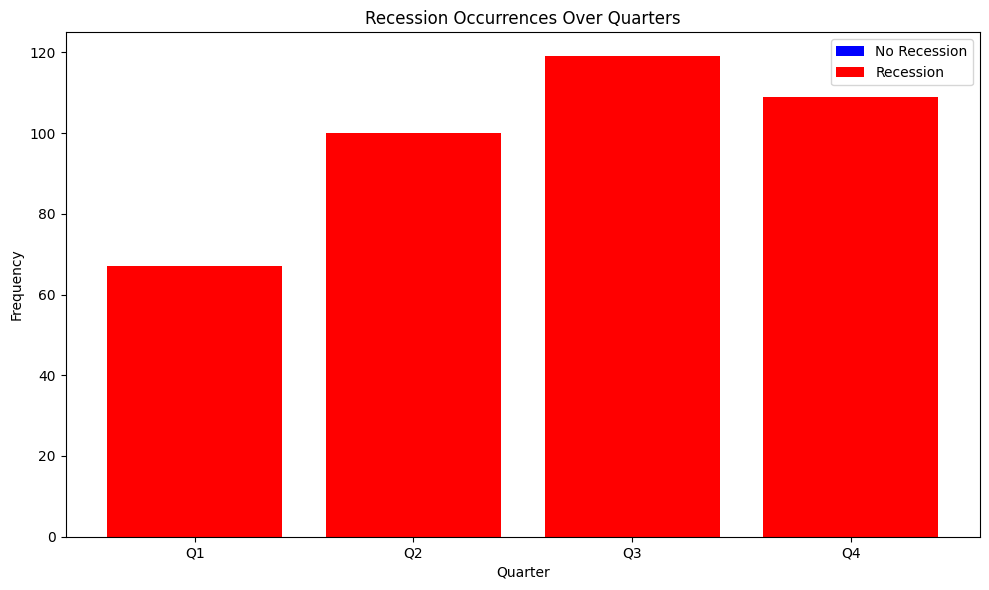

In [19]:
# Filter dataframe to include only years where recession occurred
recession_years = df[df['Recession_Indicator'] == 1]

# Plotting
plt.figure(figsize=(10, 6))
quarters = ['Q1', 'Q2', 'Q3', 'Q4']

for quarter in quarters:
    # Count occurrences of recession indicator for each quarter
    count_0 = len(recession_years[recession_years['Quarter'] == quarter][recession_years['Recession_Indicator'] == 0])
    count_1 = len(recession_years[recession_years['Quarter'] == quarter][recession_years['Recession_Indicator'] == 1])

    # Plotting bars
    plt.bar(quarter, count_0, color='blue', label='No Recession' if quarter == 'Q1' else '')
    plt.bar(quarter, count_1, bottom=count_0, color='red', label='Recession' if quarter == 'Q1' else '')

plt.title('Recession Occurrences Over Quarters')
plt.xlabel('Quarter')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()


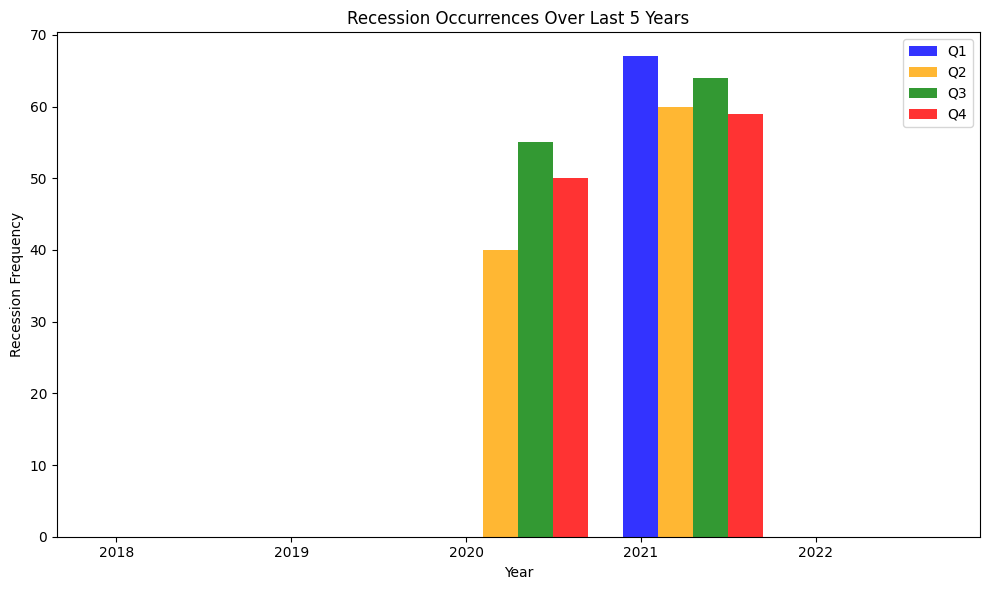

In [22]:
# Filter dataframe to include only the last 5 years
last_5_years_df = df[df['Year'] >= df['Year'].max() - 4]

# Grouping by year and quarter and counting occurrences of recession
recession_counts = last_5_years_df.groupby(['Year', 'Quarter'])['Recession_Indicator'].sum().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))

quarters = ['Q1', 'Q2', 'Q3', 'Q4']
bar_width = 0.2
opacity = 0.8
index = range(len(recession_counts))

colors = ['blue', 'orange', 'green', 'red']

for i, quarter in enumerate(quarters):
    plt.bar([x + i * bar_width for x in index], recession_counts[quarter], bar_width,
            alpha=opacity, color=colors[i], label=quarter)

plt.xlabel('Year')
plt.ylabel('Recession Frequency')
plt.title('Recession Occurrences Over Last 5 Years')
plt.xticks(index, recession_counts.index)
plt.legend()
plt.tight_layout()
plt.show()


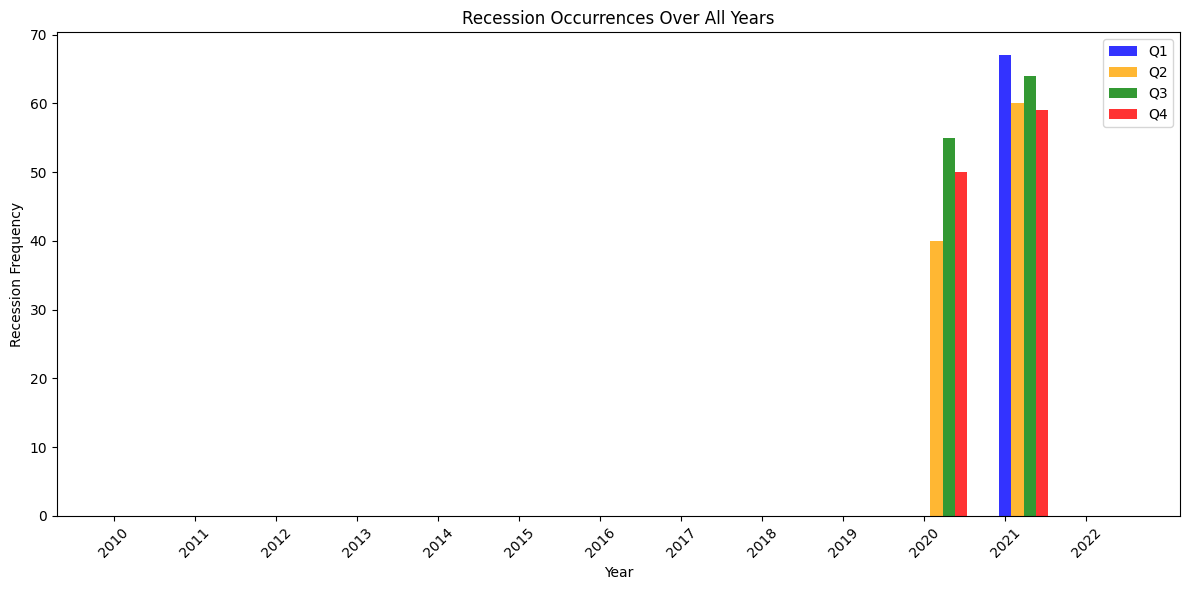

In [23]:
# Grouping by year and quarter and counting occurrences of recession
recession_counts = df.groupby(['Year', 'Quarter'])['Recession_Indicator'].sum().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(12, 6))

quarters = ['Q1', 'Q2', 'Q3', 'Q4']
bar_width = 0.15
opacity = 0.8
index = range(len(recession_counts))

colors = ['blue', 'orange', 'green', 'red']

for i, quarter in enumerate(quarters):
    plt.bar([x + i * bar_width for x in index], recession_counts[quarter], bar_width,
            alpha=opacity, color=colors[i], label=quarter)

plt.xlabel('Year')
plt.ylabel('Recession Frequency')
plt.title('Recession Occurrences Over All Years')
plt.xticks(index, recession_counts.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [20]:
# Extract the relevant columns
quarters = df['Year'].astype(str) + '-' + df['Quarter']
inflation = df['Inflation']
gdp_growth = df['GDP_Growth']
industrial_production = df['Industrial_Production']

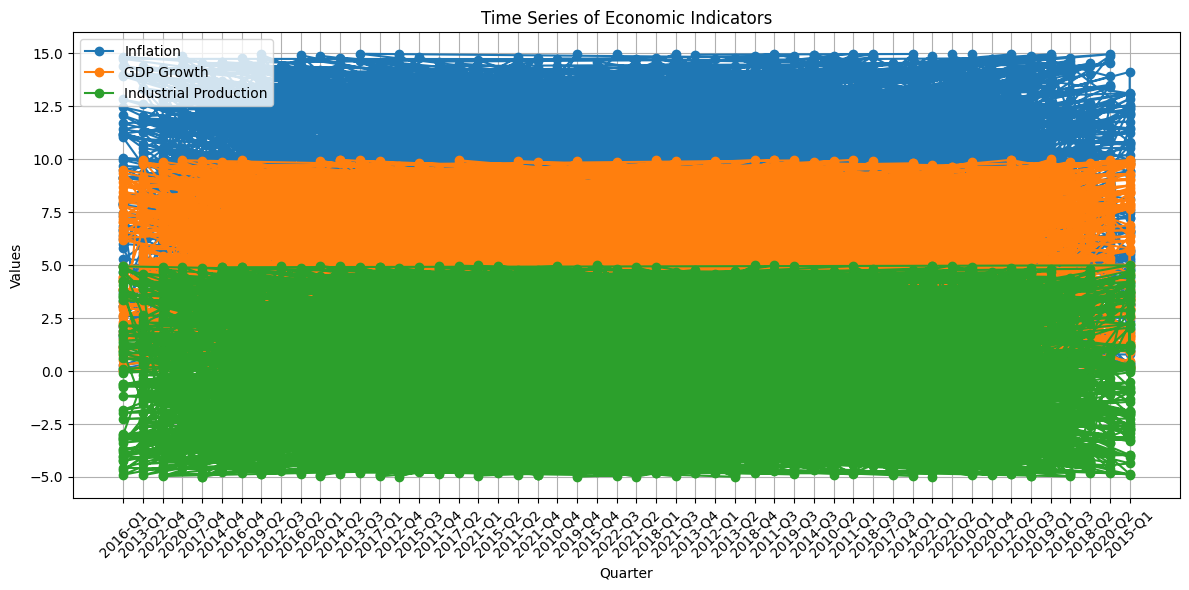

In [21]:
# Create a line graph
plt.figure(figsize=(12, 6))
plt.plot(quarters, inflation, label='Inflation', marker='o')
plt.plot(quarters, gdp_growth, label='GDP Growth', marker='o')
plt.plot(quarters, industrial_production, label='Industrial Production', marker='o')

plt.xlabel('Quarter')
plt.ylabel('Values')
plt.title('Time Series of Economic Indicators')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()